## Description of reorientation dynamics w.r.t. a landmark in 2D


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
#axis beautification
def myAxisTheme(myax):
    myax.get_xaxis().tick_bottom()
    myax.get_yaxis().tick_left()
    myax.spines['top'].set_visible(False)
    myax.spines['right'].set_visible(False)

### Set some parameters

In [19]:
rs = [0, 3, 7.5, 15, 22.5, 30]

color_idx = np.linspace(0.3, 1, len(rs))

vt = 5

x_0 = 20
x_n = -20

npts = 100

### Relative orientation during to translation along straight lines

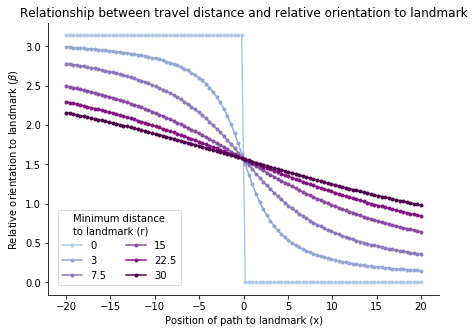

In [20]:
# movement along line, apporaching shortest possible distance to landmark (x_i = 0 -> d = r)
x = np.linspace(x_0,x_n,npts) 

fig, ax = plt.subplots(1,1,figsize=(7,5))

for i, r in enumerate(rs):
    b = np.arctan( r / x)
    
    b[x < 0] = np.arctan( r / x[x < 0]) + np.pi
        
    ax.plot(x, b , '.-', color = plt.cm.BuPu(color_idx[i]))
ax.legend(rs, title='Minimum distance\nto landmark (r)', loc=3, ncol=2, borderaxespad=1)
ax.set_xlabel(r'Position of path to landmark (x)')
ax.set_ylabel(r'Relative orientation to landmark ($\beta$)')
ax.set_title('Relationship between travel distance and relative orientation to landmark', fontsize=12)
myAxisTheme(ax)

fig.savefig('path2beta_vt-'+str(vt)+'_x0-'+ str(x_0)+'.pdf')

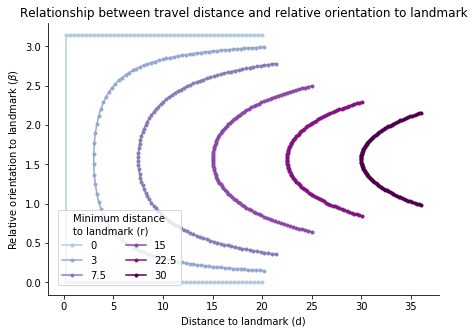

In [21]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

for i, r in enumerate(rs):
    b = np.arctan( r / x)
    b[x < 0] = np.arctan( r / x[x < 0]) + np.pi
    
    d = x/np.cos(b)
    
    ax.plot(d, b , '.-', color = plt.cm.BuPu(color_idx[i]))
ax.legend(rs, title='Minimum distance\nto landmark (r)', loc=3, ncol=2, borderaxespad=1)
ax.set_xlabel(r'Distance to landmark (d)')
ax.set_ylabel(r'Relative orientation to landmark ($\beta$)')
ax.set_title('Relationship between travel distance and relative orientation to landmark', fontsize=12)
myAxisTheme(ax)

fig.savefig('distance2beta_vt-'+str(vt)+'_x0-'+ str(x_0)+'.pdf')

### Change of relative orientation over approach during approach with fixed vt

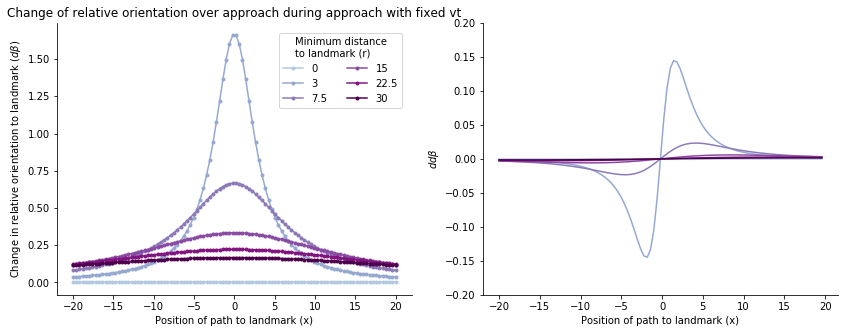

In [22]:
t = np.linspace(0, (x_0-x_n)/vt, npts)

fig, axs = plt.subplots(1,2,figsize=(14,5))

x_t = x_0 - vt*t
for i, r in enumerate(rs):
    
    db =  ( r * vt ) / ( np.square(x_0 - vt*t) + r*r  )
        
    axs[0].plot(x_t, db , '.-', color = plt.cm.BuPu(color_idx[i]), label=str(r))
    
    axs[1].plot(x_t[1:], np.diff(db) , '-', color = plt.cm.BuPu(color_idx[i]), label=str(r))

axs[0].legend(title='Minimum distance\nto landmark (r)', loc=0, ncol=2, borderaxespad=1)
axs[0].set_xlabel(r'Position of path to landmark (x)')
axs[0].set_ylabel(r'Change in relative orientation to landmark ($ d\beta$)')
axs[0].set_title('Change of relative orientation over approach during approach with fixed vt', fontsize=12)

axs[1].set_ylim(-.2,0.2)
axs[1].set_xlabel(r'Position of path to landmark (x)')
axs[1].set_ylabel(r'$ d d\beta$')

for ax in axs:
    myAxisTheme(ax)
    
fig.savefig('distance2deltabeta_vt-'+str(vt)+'_x0-'+ str(x_0)+'.pdf')

### Change in relative orientation (d$\beta$) as function of $\beta$(x, r)

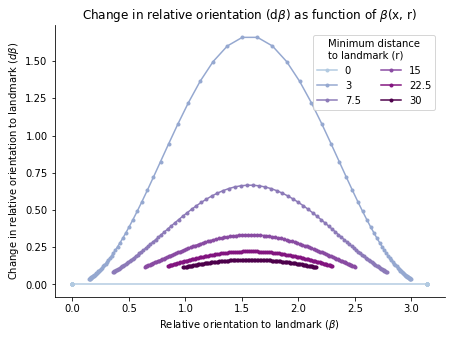

In [23]:
fig, ax = plt.subplots(1,1,figsize=(7,5))

for i, r in enumerate(rs):
    db =  ( r * vt ) / ( np.square(x_0 - vt*t) + r*r  )
    b = np.arctan(r / x_t)
    b[x_t<0] = np.arctan(r / x_t[x_t<0])  + np.pi
    
    ax.plot(b, db , '.-', color = plt.cm.BuPu(color_idx[i]), label=str(r))
    
ax.legend(title='Minimum distance\nto landmark (r)', loc=0, ncol=2, borderaxespad=1)
ax.set_xlabel(r'Relative orientation to landmark ($\beta$)')
ax.set_ylabel(r'Change in relative orientation to landmark ($ d\beta$)')
ax.set_title(r'Change in relative orientation (d$\beta$) as function of $\beta$(x, r)',
             fontsize=12)
myAxisTheme(ax)

fig.savefig('beta2deltabeta_vt-'+str(vt)+'_x0-'+ str(x_0)+'.pdf')

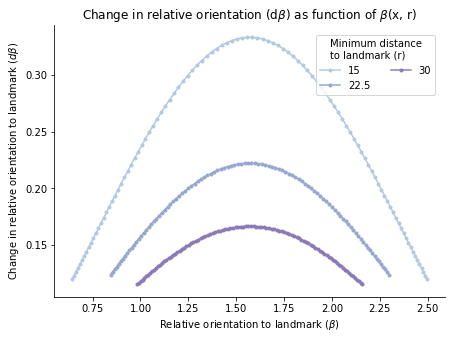

In [24]:

fig, ax = plt.subplots(1,1,figsize=(7,5))

for i, r in enumerate([15, 22.5, 30]):
    db =  ( r * vt ) / ( np.square(x_0 - vt*t) + r*r  )
    b = np.arctan(r / x_t)
    b[x_t<0] = np.arctan(r / x_t[x_t<0])  + np.pi
    
    ax.plot(b, db , '.-', color = plt.cm.BuPu(color_idx[i]), label=str(r))
    
ax.legend(title='Minimum distance\nto landmark (r)', loc=0, ncol=2, borderaxespad=1)
ax.set_xlabel(r'Relative orientation to landmark ($\beta$)')
ax.set_ylabel(r'Change in relative orientation to landmark ($ d\beta$)')
ax.set_title(r'Change in relative orientation (d$\beta$) as function of $\beta$(x, r)',
             fontsize=12)
myAxisTheme(ax)

#fig.savefig('beta2deltabeta_vt-'+str(vt)+'_x0-'+ str(x_0)+'.pdf')

### Expected distribution of $\beta$